In [1]:
import pandas as pd
import warnings
import os
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parent_dir = os.path.dirname(os.getcwd())
data_path = os.path.join(parent_dir, 'data', 'dataset')

In [3]:
dataset = pd.read_csv(os.path.join(data_path, 'dataset.csv'))
print(dataset.shape)

(1312248, 15)


Total players:  322153


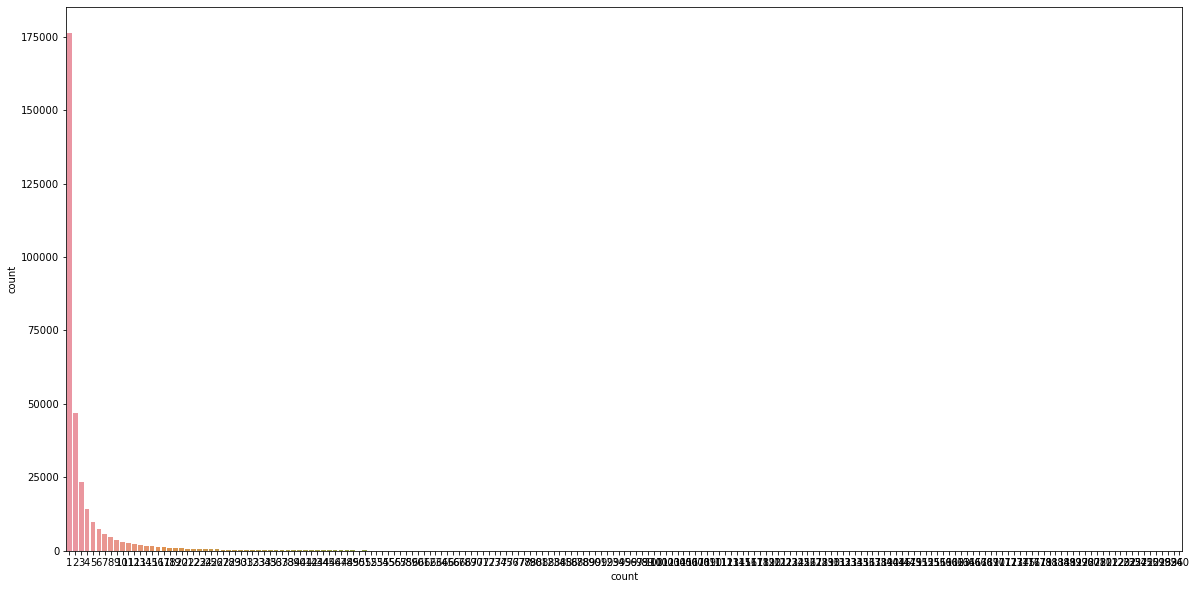

In [4]:
# unique players
counts = dataset[['PUUID']].value_counts().reset_index(name="count")
print("Total players: ", len(counts))
plt.figure(figsize=(20,10))
sns.countplot(counts['count'])
plt.show()

Total players:  11510


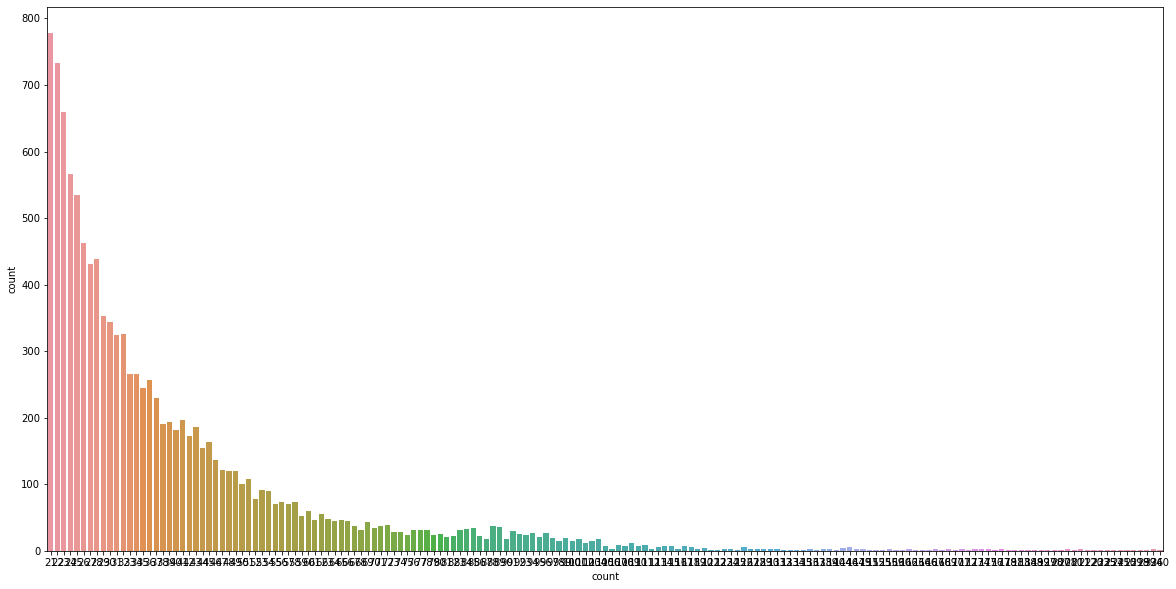

In [5]:
# unique players with more than 20 games
counts = dataset[['PUUID']].value_counts().reset_index(name="count").query("count > 20")
print("Total players: ", len(counts))
plt.figure(figsize=(20,10))
sns.countplot(counts['count'])
plt.show()

In [8]:
# players in each role
role_counts = dataset.groupby(['PUUID', "ROLE"]).size().reset_index(name="count")
print("Total players x roles: ", len(role_counts))
print("Total unique players: ", role_counts.PUUID.nunique())

Total players x roles:  452355
Total unique players:  322153


Total players x roles:  12507
Total unique players:  11980


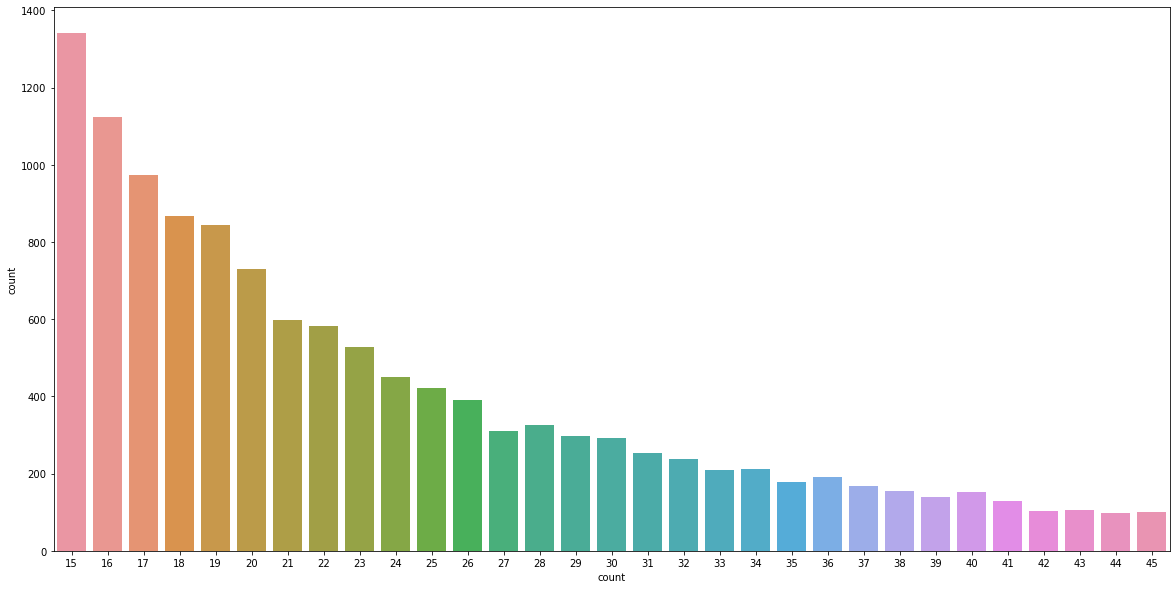

In [9]:
# players with min 15 and max 60 games in each role
role_counts = role_counts.query('count > 14').query('count < 46')
print("Total players x roles: ", len(role_counts))
print("Total unique players: ", role_counts.PUUID.nunique())
plt.figure(figsize=(20,10))
sns.countplot(role_counts['count'])
plt.show()

In [69]:
extracted = dataset.copy()

In [70]:
extracted['player_role'] = extracted['PUUID'].str.cat(extracted[['ROLE']], sep='_')
extracted['player_role'].nunique()

452355

In [71]:
player_role_counts = extracted.player_role.value_counts().reset_index(name = 'count')
player_role_counts = player_role_counts.query('count > 14').query('count < 46')

In [72]:
extracted = extracted[extracted.player_role.isin(player_role_counts['index'])]
extracted.player_role.nunique()

12507

In [82]:
extracted

,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,REGION,MATCH_ID,ROLE,player_role
5,18875,217,True,18,8,5,Samira,33,qznX9K4_EITdadLJBTrTj22x_27pqrpuA6c1aTq1-3AeYq...,29005,just Logic,11.14.384.6677,TR1,1201957752_TR1,bottom,qznX9K4_EITdadLJBTrTj22x_27pqrpuA6c1aTq1-3AeYq...
12,18806,254,True,10,17,7,Yone,19,q-kCvxUxu5fAVilpeeKTWG2OYldWX3n8akfNGXKt9moNOi...,36232,Im Leon Kennedy,11.15.389.2308,LA1,1118868552_LA1,middle,q-kCvxUxu5fAVilpeeKTWG2OYldWX3n8akfNGXKt9moNOi...
25,10449,24,True,8,16,3,FiddleSticks,26,x8Bft0cHjvbPCs3NV86sZkPUQMvDNcF7sXYjnXmaJyJwhY...,18389,Yınıs,11.13.382.1241,TR1,1201281015_TR1,jungle,x8Bft0cHjvbPCs3NV86sZkPUQMvDNcF7sXYjnXmaJyJwhY...
29,10681,157,True,3,12,5,AurelionSol,13,XqpW60qiVFGt2Q8tczYj4-_-nPN_R441-2xkYDaVdJml9q...,13885,Crazy Aurelion,11.13.382.1241,TR1,1201191468_TR1,middle,XqpW60qiVFGt2Q8tczYj4-_-nPN_R441-2xkYDaVdJml9q...
31,13584,148,True,13,9,8,Caitlyn,10,MoGHCpW2fpHQZMyXsonT8P_Maqjxy10SprzQTBkh4UEf8g...,34332,Unforgiven,11.13.382.1241,TR1,1201191468_TR1,bottom,MoGHCpW2fpHQZMyXsonT8P_Maqjxy10SprzQTBkh4UEf8g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312215,9460,32,True,2,15,7,Nautilus,77,FrHbp1XNgUIj24OvpQNQvpytVMdbldzl5P_-sJRiOBK5zP...,13364,EliteJoint,11.13.382.1241,EUW1,5354922482_EUW1,utility,FrHbp1XNgUIj24OvpQNQvpytVMdbldzl5P_-sJRiOBK5zP...
1312218,6681,110,False,1,3,13,Fiora,12,rSgBYOIIhRedCWP8HfR4okLLndVGIkFzQBudW5f6Id_qRH...,16815,TurningBackTime1,11.13.382.1241,EUW1,5354839245_EUW1,top,rSgBYOIIhRedCWP8HfR4okLLndVGIkFzQBudW5f6Id_qRH...
1312224,7475,48,False,4,6,8,Neeko,47,WMUn9-RFcfOlmQ96JMq7rUefcVr2NeCscrgfPrsIzicuAn...,12903,AquaCloak,11.13.382.1241,EUW1,5354839245_EUW1,utility,WMUn9-RFcfOlmQ96JMq7rUefcVr2NeCscrgfPrsIzicuAn...
1312226,8649,42,False,3,6,7,Ekko,5,1DGqHZrWv8Ekklozh7V_nwAwfVe5EoKcESGD7AUvRDLhd0...,6997,imawasteofspace,11.13.382.1241,EUW1,5354839245_EUW1,jungle,1DGqHZrWv8Ekklozh7V_nwAwfVe5EoKcESGD7AUvRDLhd0...


In [83]:
match_counts = dataset.MATCH_ID.value_counts().reset_index(name = 'count')
match_counts = match_counts.query('count == 10')
match_counts

,index,count
0,1201957752_TR1,10
1,1105779563_LA1,10
2,2326246890_BR1,10
3,2326330848_BR1,10
4,2326635837_BR1,10
...,...,...
127403,1093218191_LA1,10
127404,5312300925_EUW1,10
127405,2297106099_BR1,10
127406,5262064940_EUW1,10
